In [90]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (400., 150.)
from salem import get_demo_file, open_xr_dataset, GeoTiff, wgs84
%matplotlib inline
import glob
from utils import u_darrays as uda
import cartopy.crs as ccrs
import cartopy

In [3]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [60]:
path = '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/'
hfiles = glob.glob(path+'*')

In [61]:
hfiles

['/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200705161700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201007041700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201309181700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200408091700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201405301700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201109241700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201109201700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201206131700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201210251700',
 '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200907131700',


In [95]:
dat = xr.open_dataset(hfiles[15])

In [96]:
hfiles[15]

'/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200905111700'

In [97]:
lon = np.linspace(-20,20,1436)
lat = np.linspace(0,20,714)

In [98]:
dat

<xarray.Dataset>
Dimensions:        (phony_dim_0: 714, phony_dim_1: 1436)
Dimensions without coordinates: phony_dim_0, phony_dim_1
Data variables:
    lsta_av        (phony_dim_0, phony_dim_1) int16 ...
    lsta_av_count  (phony_dim_0, phony_dim_1) int16 ...

In [99]:
dat = dat.rename({'phony_dim_0':'lat', 'phony_dim_1' : 'lon'})

In [100]:
dat2 = dat.assign_coords(lat = lat[::-1], lon=lon)

In [101]:
dat2 = uda.flip_lat(dat2)

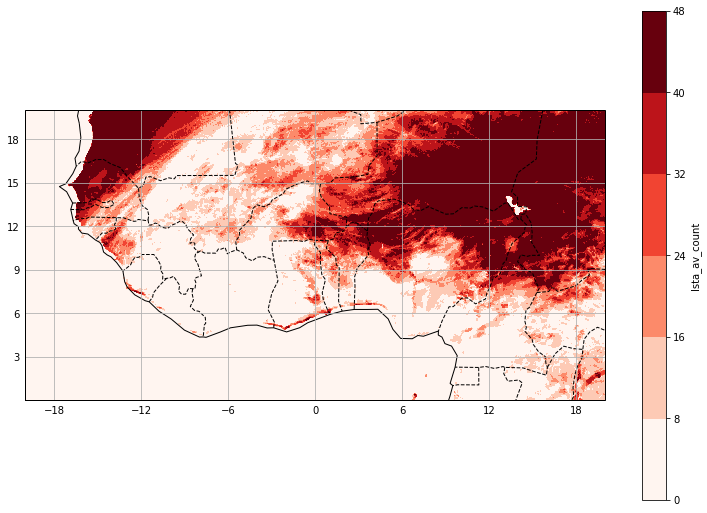

In [105]:
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
dat2['lsta_av_count'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds')
ax.coastlines()   ## adds coastlines
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
f.savefig('/home/ck/DIR/cornkle/data/NFLICS/NFLICS_lsta_test.png')

In [71]:
lon = np.linspace(-20,20,1436)
lat = np.linspace(0,20,714)
hfiles = glob.glob('/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf_raw/*')
for f in hfiles:
    dat = xr.open_dataset(f)
    dat = dat.rename({'phony_dim_0':'lat', 'phony_dim_1' : 'lon', 'lsta_av' : 'lsta', 'lsta_av_count' : 'NbSlot'})
    dat2 = dat.assign_coords(lat = lat[::-1], lon=lon)
    dat2 = uda.flip_lat(dat2)
    dat2['lsta'].values = np.array(dat2['lsta'].values).astype(float)
    dat2['lsta'].values[dat2['lsta'].values==-9999] = np.nan
    dat2['lsta'].values = dat2['lsta'].values/100.
    comp = dict(zlib=True, complevel=5)
    enc = {var: comp for var in dat2.data_vars}
    savefile = f.replace('_raw', '')+'.nc'
    dat2.to_netcdf(path=savefile, mode='w', encoding=enc, format='NETCDF4')